In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib as mpl
from sklearn.linear_model import Ridge
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import copy

import scipy.spatial.distance as spd
import ResidualDecomposition as RD

np.random.seed(0)

In [2]:
data = pd.read_csv("Datasets/P_BostonHousing.csv") 
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

In [3]:
# runtimes_monte_carlo = []
# starting_N = 2
# N = X.shape[0]
# permutation = np.random.permutation(np.arange(0, N))
# lr = Ridge()

# for i in range(5, N, 3):
#     permutation = np.random.permutation(permutation)
#     X_sub = X[permutation][:i]
#     Y_sub = Y[permutation][:i]
    
#     t1 = time.time()
#     rdshap = RD.ResidualDecompositionSymmetricStopping()
#     rdshap.fit(X_sub, Y_sub, lr)
#     t2 = time.time()
    
#     runtimes_monte_carlo.append((t2 - t1))
#     print("Runtime of {} samples is {}".format(i, t2-t1))
    
# np.savetxt("Data/runtimes_monte_carlo.csv", runtimes_monte_carlo, delimiter=',')

In [4]:
# runtimes_influence = []
# starting_N = 2
# N = X.shape[0]
# np.savetxt("Data/runtimes_all_S_influence.csv", runtimes_influence, delimiter=',')
# permutation = np.random.permutation(np.arange(0, N))
# lr = Ridge()

# for i in range(5, N, 3):
#     permutation = np.random.permutation(permutation)
#     X_sub = X[permutation][:i]
#     Y_sub = Y[permutation][:i]
    
#     t1 = time.time()
#     rdshap = RD.ResidualDecompositionSymmetricInfluenceFunctionLinear(X_sub, Y_sub, lr)
#     rdshap.All_S_Influence(15000)
#     t2 = time.time()
    
#     runtimes_influence.append((t2 - t1))
#     print("Runtime of {} samples is {}".format(i, t2-t1))
    
# np.savetxt("Data/runtimes_all_S_influence.csv", runtimes_influence, delimiter=',')

In [5]:
# runtimes_influence_largest = []
# starting_N = 2
# N = X.shape[0]
# permutation = np.random.permutation(np.arange(0, N))
# lr = Ridge()

# for i in range(5, N, 3):
#     permutation = np.random.permutation(permutation)
#     X_sub = X[permutation][:i]
#     Y_sub = Y[permutation][:i]
    
#     t1 = time.time()
#     rdshap = RD.ResidualDecompositionSymmetricInfluenceFunctionLinear(X_sub, Y_sub, lr)
#     rdshap.Largest_S_Influence(100)
#     t2 = time.time()
    
#     runtimes_influence_largest.append((t2 - t1))
#     print("Runtime of {} samples is {}".format(i, t2-t1))
    
# np.savetxt("Data/runtimes_largest_S_influence.csv", runtimes_influence, delimiter=',')

In [40]:
# runtimes_kshap = []
# starting_N = 2
# N = X.shape[0]
# permutation = np.random.permutation(np.arange(0, N))
# lr = Ridge()

# for i in range(5, N, 3):
#     permutation = np.random.permutation(permutation)
#     X_sub = X[permutation][:i]
#     Y_sub = Y[permutation][:i]
    
#     t1 = time.time()
#     rdshap = RD.residual_shap_WLSN(X, Y, lr, D=10000)
#     t2 = time.time()
    
#     runtimes_kshap.append((t2 - t1))
#     print("Runtime of {} samples is {}".format(i, t2-t1))
    
# np.savetxt("Data/runtimes_kshap.csv", runtimes_kshap, delimiter=',')

In [41]:
runtimes_influence = np.genfromtxt("Data/runtimes_all_S_influence.csv", delimiter=',')
runtimes_monte_carlo = np.genfromtxt("Data/runtimes_monte_carlo.csv", delimiter=',')
runtimes_influence_largest = np.genfromtxt("Data/runtimes_largest_S_influence.csv", delimiter=',')
runtimes_kshap = np.genfromtxt("Data/runtimes_kshap.csv", delimiter=',')

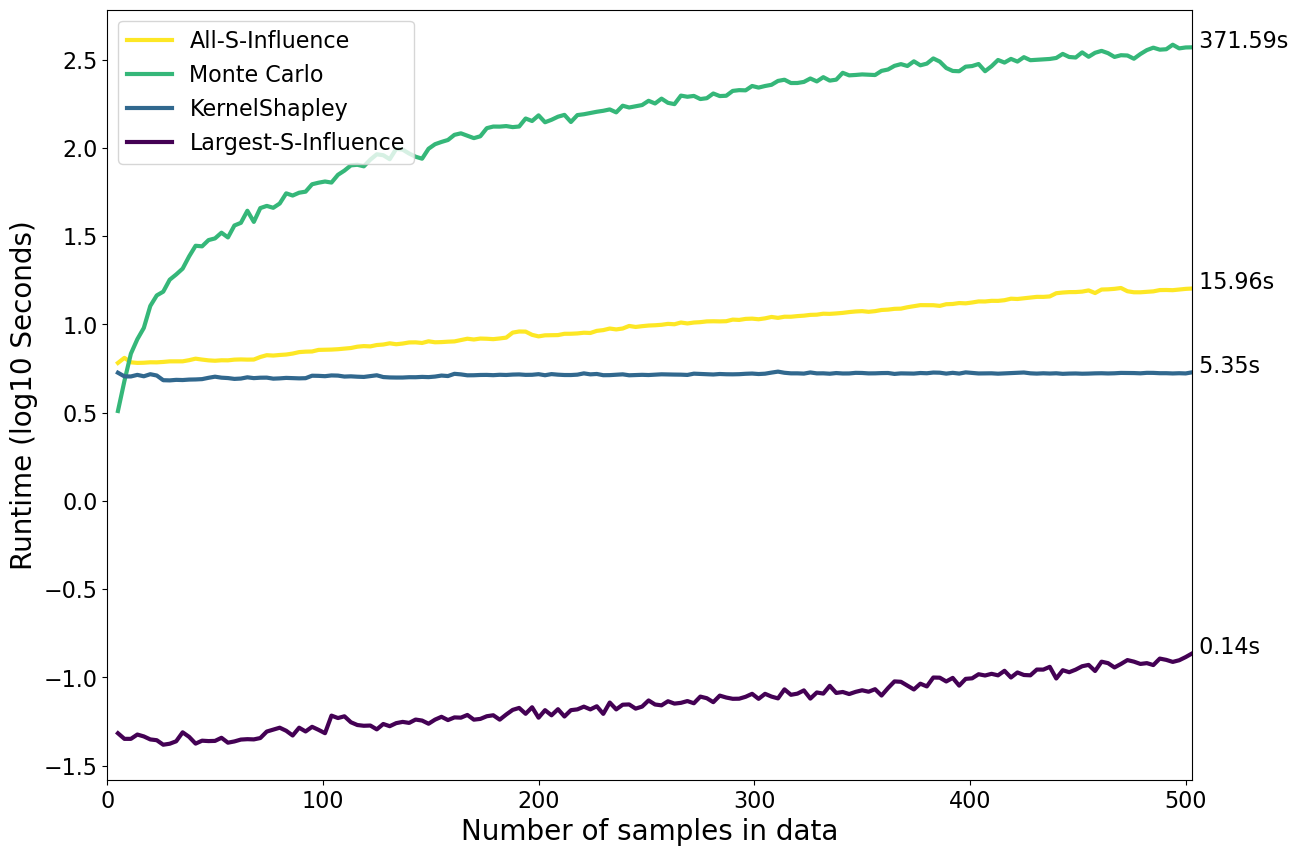

In [43]:
plt.figure(figsize=(14,10))

plt.plot(list(range(5, N, 3)), np.log10(runtimes_influence), label="All-S-Influence", linewidth=3, c="#fde725")
plt.plot(list(range(5, N, 3)), np.log10(runtimes_monte_carlo), label='Monte Carlo', linewidth=3, c="#35b779")
plt.plot(list(range(5, N, 3)), np.log10(runtimes_kshap), label='KernelShapley', linewidth=3, c="#31688e")
plt.plot(list(range(5, N, 3)), np.log10(runtimes_influence_largest), label='Largest-S-Influence', linewidth=3, c="#440154")
plt.xlabel("Number of samples in data", fontsize=20)
plt.ylabel("Runtime (log10 Seconds)", fontsize=20)

plt.annotate(" {}s".format(np.round(runtimes_influence_largest[-1], 2)), (503, np.log10(runtimes_influence_largest[-1])), fontsize=16)
plt.annotate(" {}s".format(np.round(runtimes_kshap[-1], 2)), (503, np.log10(runtimes_kshap[-1])), fontsize=16)
plt.annotate(" {}s".format(np.round(runtimes_monte_carlo[-1], 2)), (503, np.log10(runtimes_monte_carlo[-1])), fontsize=16)
plt.annotate(" {}s".format(np.round(runtimes_influence[-1], 2)), (503, np.log10(runtimes_influence[-1])), fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([0, 503])
plt.legend(fontsize=16)

plt.savefig("Figures/Boston_runtimecomp.pdf", bbox_inches='tight')